In [2]:
# setting up the environment 
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Data Import 

# This cell updates result list for images with tumor

data = []
paths = []
result = []

encoder = OneHotEncoder()  # or sparse_output=False if using newer sklearn
encoder.fit([[0], [1]])  # fit with all possible classes

for r, d, f in os.walk(r"C:\Users\DELL X360 i7\OneDrive\Desktop\brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)

    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
        
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\DELL X360 i7\OneDrive\Desktop\brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [4]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [5]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 139


In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
# Splitting the data into training and testing 

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [8]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 111


In [9]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 28


## Building the main AI model

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
y_train.shape

(111, 2)

## Evaluating the model


This section is the training process of a machine learning model using a Convolutional Neural Network (CNN) architecture in Google Colab. The training is set to run for 30 epochs, which means the model will have 30 complete passes through the entire training dataset. During each epoch, the model learns by adjusting its weights to minimize the difference between its predictions and the actual data.

The batch size is set to 40, indicating that the model will use 40 images at a time to update its weights. The 'verbose' parameter set to 1 enables progress logs to be displayed, showing us the loss (a measure of how far the model's predictions are from the actual labels) and validation loss (the same measure, but calculated using a separate set of data not used in training) after each epoch.

From the output, we can see that as the epochs progress, both the training loss and the validation loss generally decrease, which suggests that the model is learning and improving its predictions on both the training and validation datasets. This output is crucial for monitoring the training process and determining if and when the model is ready for evaluation or deployment.






In [12]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 43.9012 - accuracy: 0.4595 - val_loss: 83.0885 - val_accuracy: 0.6071
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 11.9738 - accuracy: 0.7477 - val_loss: 28.5465 - val_accuracy: 0.6786
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 2.7310 - accuracy: 0.8018 - val_loss: 8.4741 - val_accuracy: 0.6786
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 2.7179 - accuracy: 0.8378 - val_loss: 10.3890 - val_accuracy: 0.6786
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 3.1340 - accuracy: 0.8288 - val_loss: 14.1367 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 1.7598 - accuracy: 0.8739 - val_loss: 10.2655 - val_accuracy: 0.6786
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 1.6583 - accuracy: 0.8739 - val_loss: 6.8977 - val_accuracy: 0.7857
Epoch 8/30
3/3 [==================

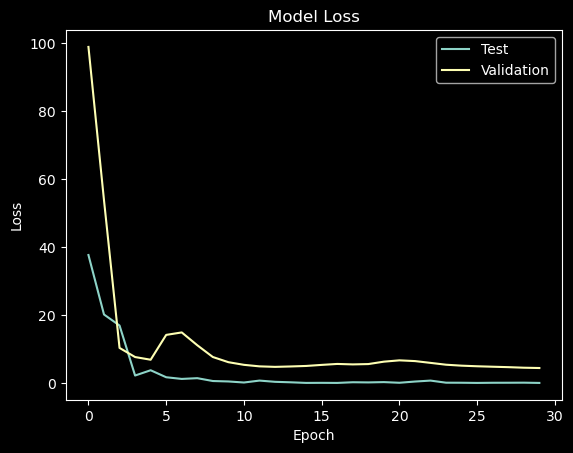

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

## Testing the model


In the testing phase of our machine learning project, we evaluate the model's performance using new images it hasn't seen before. The code snippet demonstrates how to test the model with an MRI image that has a tumor and one which does not have a tumor.

The process involves loading the image, resizing it to match the input size the model expects, and then reshaping it to the appropriate format for the model to process. The model then predicts whether a tumor is present or not.

The result, displayed below the image, shows the model's confidence level in its prediction. In both cases, we see that the model correctly classifies a "non-tumor" image as "not a tumor" and a "tumor" image as a "tumor" image.

This means that our model is trained successfully now!






100.0% Confidence This Is No, Its not a tumor


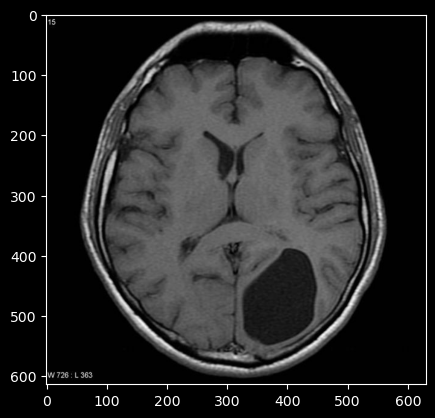

In [27]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'
    
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\DELL X360 i7\OneDrive\Desktop\brain_tumor_dataset/no/N11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))    


99.99974966049194% Confidence This Is A Its a Tumor


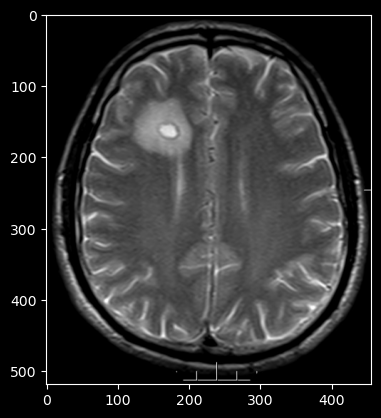

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\DELL X360 i7\OneDrive\Desktop\brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

## Building the AI app for prediction 

In [29]:
#@title Provide a title for your app:
heading_title = "Edem brain tumor classification app" # @param {type:"string"}

In [30]:
#@title You can add some example images that you want to be present in your app by default. The user can see use these images to quickly and easily test the model. How many example images do you want to load?
num_examples = 2 # @param {type:"slider", min:1, max:6, step:1}

In [ ]:
# title Enter the paths for the example images that you want displayed in your app by default. The user can use these images to quickly and easily test the model. Note: You can get the path for the file from the left sidebar. Simply run the code below, select the image file you want to include from its folder, right-click and select 'Copy path'. Then paste the path in the input box displayed:

num_examples = 2

examples=[]
for i in range(num_examples):
  example_path = input(f"C:\\Users\\DELL X360 i7\\OneDrive\\Desktop\brain_tumor_dataset{i+1}: ").strip()
  base_path = r"C:\Users\DELL X360 i7\OneDrive\Desktop\brain_tumor_dataset"
  example_path = os.path.join(base_path, f"yes\Y{i+1}.jpg")
  if os.path.exists(example_path):
    examples.append(example_path)
  else:
    print(f"File not found:{example_path}")
  

#Displaying the selected images side by side
rows = 1
plt.figure(figsize=(16, 8))
for num, x in enumerate(examples):
    img = Image.open(x)
    plt.subplot(rows,6,num+1)
   # plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

In [ ]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}

# The selected theme is determined by the user's dropdown selection
selected_theme = theme_dict[theme_selection]

# Now you can use the selected_theme variable when you create your Gradio interface

In [ ]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((128, 128))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 128, 128, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    # Map the class index to the actual class name (assuming you have a list of class names)
    class_names = ['No Tumor', 'Tumor']  # Example class names, update according to your model
    result = f"{names(classification)}"

    return result


In [ ]:
# Assuming recognize_image, examples, heading_title, desc, long_desc, and selected_theme are defined elsewhere.

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)
